# Analyser le montant du loyer dans les communes affectées suivant l’année, les quartiers …

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../data/Data_final.csv")

In [3]:
data.shape

(234, 10)

In [4]:
data.head(5)

,ANNEE,MOIS,JOUR,NB_PIECES,TYPE,STANDING,COMMUNE,QUARTIER,LOYER,LIEN
0,2023.0,2.0,9.0,4.0,Maison,Moyen,Cocody/Riviera,Ciad,500000000,https://www.facebook.com/groups/15585629877089...
1,2023.0,2.0,9.0,4.0,Appartement,Haut,Cocody/Riviera,Ciad,670000000,https://www.facebook.com/groups/15585629877089...
2,2023.0,2.0,9.0,4.0,Maison,Moyen,Cocody/Riviera,Ciad,500000000,https://www.facebook.com/groups/15585629877089...
3,2023.0,1.0,10.0,4.0,Appartement,Economique,Cocody/Riviera,Ciad,300000000,https://www.facebook.com/groups/15585629877089...
4,2023.0,2.0,9.0,4.0,Maison,Moyen,Cocody/Riviera,Ciad,500000000,https://www.facebook.com/groups/15585629877089...


In [6]:
# Analyse par localité de type

# grouper par "localite" et "type"
grouped = data.groupby(['COMMUNE', 'TYPE'])

# calculer le montant minimal, le montant moyen et le montant maximal pour chaque groupe
stats = grouped['LOYER'].agg(['min', 'mean', 'max'])

# afficher les résultats
print(stats)


                             min          mean         max
COMMUNE        TYPE                                       
Cocody/Riviera Appartement  1000  4.721998e+08  1600000000
               Maison       1000  1.301585e+09  8000000000


In [8]:
#Analyse par localité et par type
def par_localite_type(data):
    # grouper par "localite" et "type"
    grouped = data.groupby(['COMMUNE', 'TYPE'])

    # calculer le montant minimal, le montant moyen et le montant maximal pour chaque groupe
    stats = grouped['LOYER'].agg(['min', 'mean', 'max'])

    return stats
par_localite_type(data)

min          mean         max
COMMUNE        TYPE                                       
Cocody/Riviera Appartement  1000  4.721998e+08  1600000000
               Maison       1000  1.301585e+09  8000000000

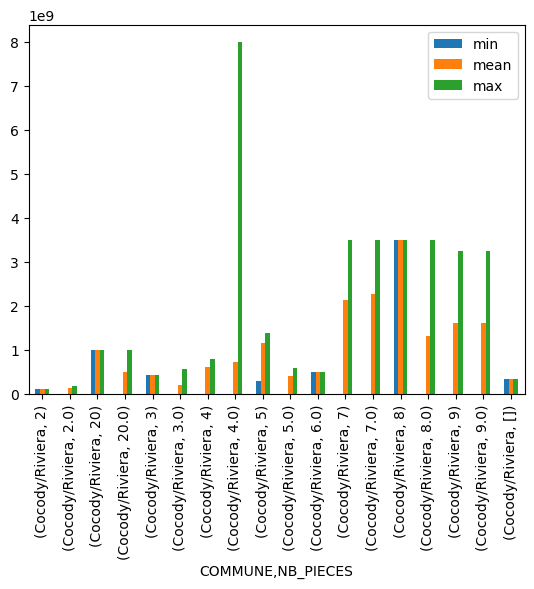

In [9]:
# Grouper par nombre de_Pièces et calcul du montant min,max,mean en fonction de la commune
def groupby_nbPiece(data):
    grouped = data.groupby(['COMMUNE', 'NB_PIECES'])
    stats = grouped['LOYER'].agg(['min', 'mean', 'max'])
    stats.plot(kind='bar')
    plt.show()
groupby_nbPiece(data)

 


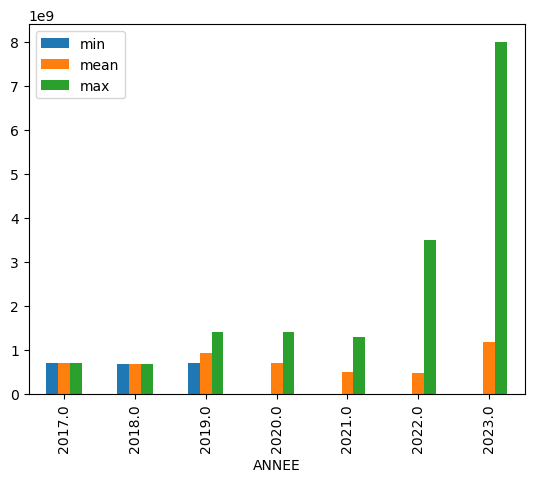

In [11]:
#graphique pour la repartition des maisons en fonction du nombre de pieces en fonction de l'annéé
def groupby_nbPiece_annee(data):
    grouped = data.groupby(['ANNEE'])
    stats = grouped['LOYER'].agg(['min', 'mean', 'max'])
    stats.plot(kind='bar')
    plt.show()
groupby_nbPiece_annee(data)
 

<AxesSubplot:xlabel='COMMUNE', ylabel='count'>

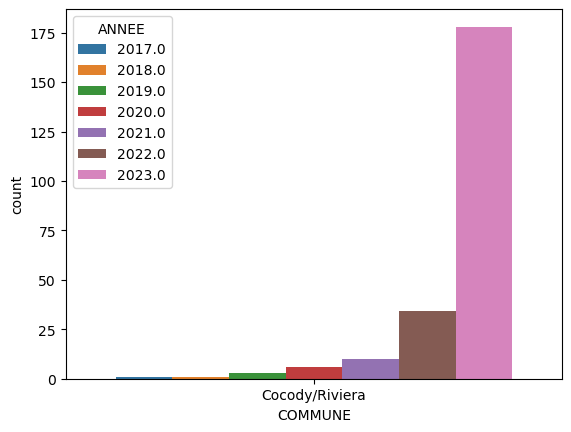

In [12]:
sns.countplot(data=data, x="COMMUNE", hue="ANNEE")

<AxesSubplot:xlabel='count', ylabel='LOYER'>

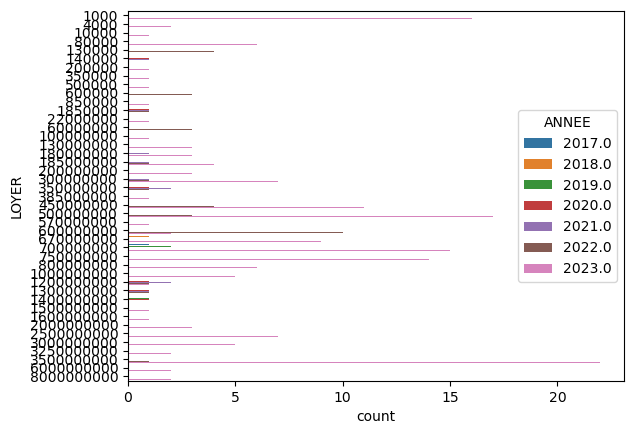

In [15]:
sns.countplot(data=data, y="LOYER", hue="ANNEE")

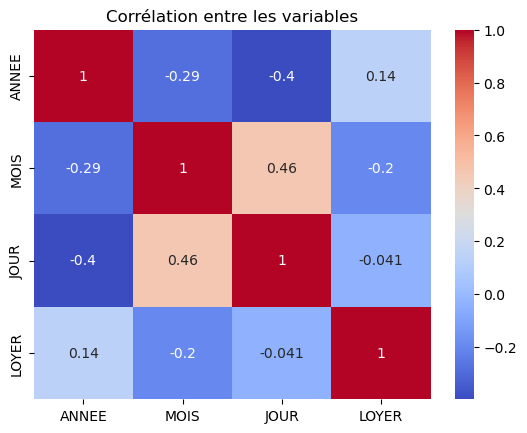

In [16]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Corrélation entre les variables')
plt.show()